# ERA vs FIP Analysis – 投手の実力と運の分析

## 1. はじめに

### 防御率だけで投手の実力は測れるのか？

防御率（ERA）は、一般的に最も知られた投手評価指標であり、失点の少なさを示す数値である。だが、ERAは味方守備の影響や偶然の要素も含むため、必ずしも投手自身の実力のみを反映しているとは限らない。

実際、同じような内容の投球をしていても、バックの守備や打球運の差によってERAが大きく異なるケースは少なくない。


そこで近年注目されているのが、**FIP（Fielding Independent Pitching）**という指標である。これは、与四球、奪三振、被本塁打といった投手のみに直接関与する要素から算出されるため、「守備から独立した投手評価」が可能である。

FIPはアメリカで生まれ、セイバーメトリクスの文脈において広く用いられてきた。現在では日本の一部球団でも導入が進んでいるが、その普及度はまだ高いとは言い難い。


本Notebookでは、ERAとFIPの差を分析することで、「成績と実力のギャップ」や「運・守備の影響の可視化」を目指す。さらに、FIPの再計算や可視化を通じて、従来の評価指標だけでは見えてこない投手の真の特徴を浮き彫りにすることが目的である。


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定（例: Windowsの「MS Gothic」、Macの「AppleGothic」など）
plt.rcParams['font.family'] = 'MS Gothic'  # ← Windowsの場合

# データ読み込み
df = pd.read_excel("bb_an.xlsx")

# 必要な列の整形（FIP計算用）
df["IP"] = df["投球回"].astype(str).str.replace(" ", "").str.replace("2/3", ".666").str.replace("1/3", ".333").astype(float)
df = df.dropna(subset=["IP", "与四球", "被本塁打", "奪三振", "自責点"])


In [24]:

# 補正定数cを計算
fip_numerator = (13 * df["被本塁打"] + 3 * df["与四球"] - 2 * df["奪三振"]) / df["IP"]
c = df["防御率"].mean() - fip_numerator.mean()
print(f"補正定数 c = {c:.3f}")

# FIPの再計算（定数9を使って9回あたりに換算）
df["FIP_calc"] = ((13 * df["被本塁打"] + 3 * df["与四球"] - 2 * df["奪三振"]) / df["IP"]) + c

# ERAとFIPの差（運の影響）
df["ERA_minus_FIP"] = df["防御率"] - df["FIP_calc"]


補正定数 c = 2.491


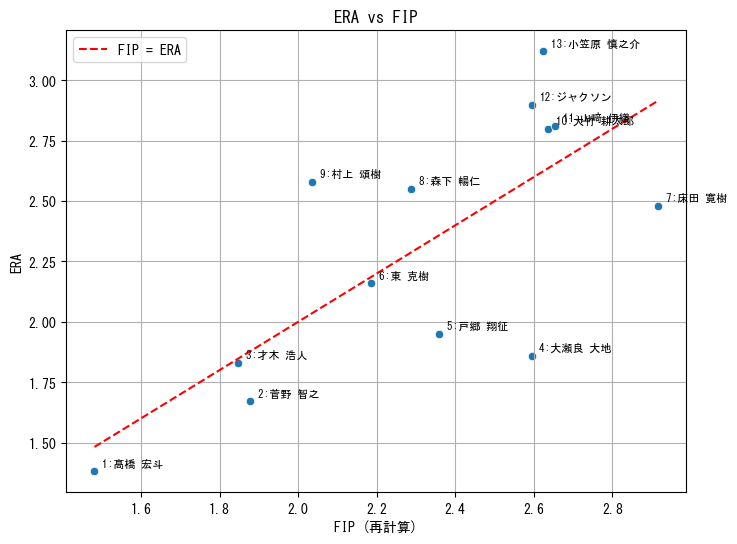

In [ ]:
plt.figure(figsize=(8,6))

# 散布図（Seaborn）
sns.scatterplot(data=df, x="FIP_calc", y="防御率")

# 斜め線（FIP = ERA）
plt.plot([df["FIP_calc"].min(), df["FIP_calc"].max()],
         [df["FIP_calc"].min(), df["FIP_calc"].max()],
         'r--', label='FIP = ERA')

# 各点に選手名を表示
for i, row in df.iterrows():
    plt.text(row["FIP_calc"] + 0.02, row["防御率"] + 0.02, row["選手名"], fontsize=8)

# 装飾
plt.title("ERA vs FIP")
plt.xlabel("FIP")
plt.ylabel("ERA")
plt.legend()
plt.grid(True)
plt.show()


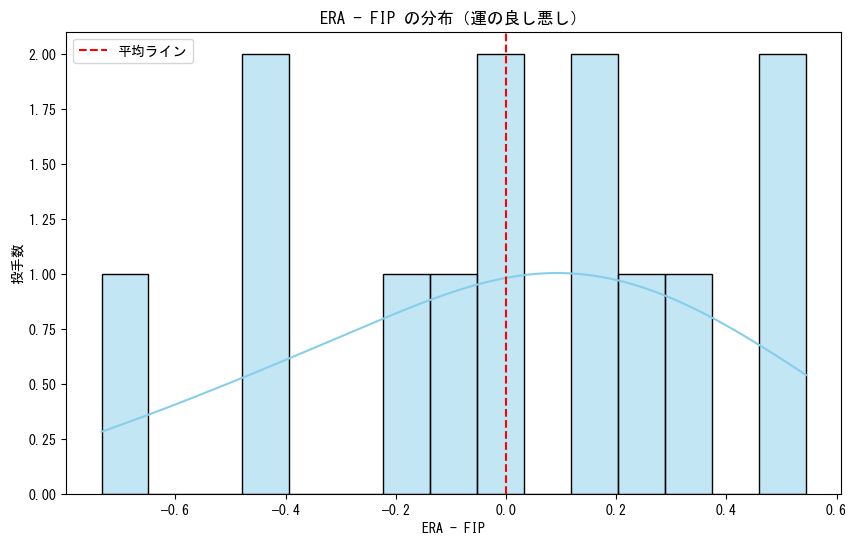

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["ERA_minus_FIP"], kde=True, bins=15, color="skyblue")
plt.axvline(0, color="red", linestyle="--", label="平均ライン")
plt.title("ERA - FIP の分布")
plt.xlabel("ERA - FIP")
plt.ylabel("投手数")
plt.legend()
plt.show()


## 考察

ERAとFIPの差を可視化することで、以下のような知見が得られた。

- FIPが低いにもかかわらずERAが高い投手は、守備の乱れや運の悪さなど、外的要因によって本来の実力よりも過小評価されている可能性がある。
- ERAが低くFIPが高い投手は、味方守備や偶然に助けられて、実力以上に好成績を残している可能性がある。
- ERAとFIPが近い投手は、比較的安定しており、実力と結果が一致していると考えられる。

ただし、FIPも三振・四死球・本塁打といった投手の直接的な結果に基づく指標であり、守備位置の最適化、捕手のリード、打球の質（ゴロやフライ）、球場の広さなど、投手以外の要素を完全には排除できない。  
したがって、FIPは「守備の影響を最小限にした投手評価指標」として有用である一方で、**それ単独では投手の実力を完全に表現するものではない**ことにも留意が必要である。



## セイバーメトリクスの意義と今後

野球界では現在、データを用いてプレイヤーを評価・起用する「セイバーメトリクス」が注目を集めている。セイバーメトリクスとは、従来の「感覚」や「実績」だけに頼らず、データに基づいた合理的な判断を行うための指標群である。

この手法はアメリカにおいてすでに標準化されており、ドラフト戦略や守備シフトなどにも活用されている。一方、日本においてはまだ発展途上であり、現場の勘や経験に依存した運用も根強い。

しかし今後、セイバーメトリクスの普及は、選手の育成や評価の客観化、戦略立案の精度向上につながる可能性が高い。


## 今後の展望

本Notebookでは、ERAとFIPという基本的な2指標を用いて、投手成績における「実力」と「運や守備の影響」の違いを可視化した。ERAとFIPの差から得られる示唆は興味深いが、FIP自体にも限界があることを念頭に置く必要がある。

FIPは三振・四死球・本塁打といった結果のみに基づいて算出されるため、捕手のリード、守備シフト、球場特性、打球の質など、投手の能力とは切り離しにくい要素の影響を完全には排除できない。  
そのため、より包括的な分析のためには、以下のようなアプローチが今後有効と考えられる：

- 時系列データを用いた年ごとのFIP・ERAの推移分析
- 球場・チーム・捕手などの環境要因を取り入れたFIP補正モデルの構築
- xFIPやSIERAといった、打球の質や平均HR率を考慮する進化型指標の導入
- 守備指標（OAA, UZR等）との連携による失点要因の分離分析
- 機械学習を用いたパフォーマンス予測モデルの実装

本分析はあくまで出発点にすぎないが、ERAとFIPを軸に投手評価の“ズレ”を捉えるという視点は、今後の多角的な成績解釈やモデル構築において有益な礎となるだろう。
